# Module D: Seth's EDA

In [1]:
TODAY = '2020-04-12'

In [2]:
import os
import pathlib
working_dir = pathlib.Path().absolute()
os.chdir(working_dir)

In [3]:
import pandas as pd
import numpy as np

from matplotlib import pyplot
import matplotlib.pylab as plt 
%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import descartes 
import geopandas as gpd
from shapely.geometry import Point, Polygon
from geopy import geocoders
from geopy.geocoders import Nominatim
import time

from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="SethBilliau")

In [4]:
# Parsers
dateparse0 = lambda x: pd.datetime.strptime(x, "%m/%d/%Y %H:%M")
dateparse1 = lambda x: pd.datetime.strptime(x, "%m/%d/%y %H:%M")
dateparse2 = lambda x: pd.datetime.strptime(x, "%Y-%m-%d" + "T" + "%H:%M:%S")
dateparse3 = lambda x: pd.datetime.strptime(x, "%Y-%m-%d %H:%M:%S")
dateparse4 = lambda x: pd.datetime.strptime(x, "%m/%d/%y %H:%M")

In [5]:
# Format 0 - the following columns exist: 
# Dates: 01-22-2020 to 02-29-2020
df_full_early = []
format0 = ["01-22-2020", "01-31-2020", "02-01-2020"]
for ii in format0: 
    df_early = pd.read_csv('data/CSSEGIS_COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/'+ii +'.csv',
                           parse_dates=['Last Update'],
                           date_parser=dateparse0)
    df_full_early.append(df_early)

for ii in np.arange(23,31,1):
    df = pd.read_csv('data/CSSEGIS_COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/01-'+str(ii)+'-2020.csv',
                       parse_dates=['Last Update'],
                       date_parser=dateparse1)
    df_full_early.append(df)

# Inexplicable third date time format
for ii in np.arange(2,30,1):
    if (ii < 10): 
        label = "0" + str(ii)
    else: 
        label = str(ii)
    df = pd.read_csv('data/CSSEGIS_COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/02-'+label+'-2020.csv',
                       parse_dates=['Last Update'],
                       date_parser=dateparse2)
    df_full_early.append(df)

    
# Write Early files
df_to_write1 = pd.concat(df_full_early, axis=0, ignore_index=True).sort_values(by=["Last Update", "Country/Region"])
df_to_write1 = df_to_write1.drop_duplicates(subset=df_to_write1.columns).reset_index(drop=True)
df_to_write1

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,Hong Kong,Hong Kong,2020-01-22 17:00:00,NaN,NaN,NaN
1,NaN,Japan,2020-01-22 17:00:00,2.0,NaN,NaN
2,Macau,Macau,2020-01-22 17:00:00,1.0,NaN,NaN
3,Anhui,Mainland China,2020-01-22 17:00:00,1.0,NaN,NaN
4,Beijing,Mainland China,2020-01-22 17:00:00,14.0,NaN,NaN
...,...,...,...,...,...,...
1790,NaN,Norway,2020-02-29 23:13:06,15.0,0.0,0.0
1791,"Toronto, ON",Canada,2020-02-29 23:23:13,10.0,0.0,2.0
1792,British Columbia,Canada,2020-02-29 23:23:13,8.0,0.0,3.0
1793,Hainan,Mainland China,2020-02-29 23:43:02,168.0,5.0,148.0


In [6]:
df_to_write1.to_csv(r'seth/df_format1.csv', index = False, header=True)

In [7]:
# Format 2 - columns added
# Lat long added 3/1 to 3/21 - HOWEVER, some data was backlogged in these .csvs all the way to 3/1
date1 = '2020-03-01'
date2 = '2020-03-21'
format2_dates = pd.date_range(date1, date2).strftime("%m-%d-%Y").tolist()
df_format2 = []

for label in format2_dates:
    df = pd.read_csv('data/CSSEGIS_COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/'+label+'.csv',
                       parse_dates=['Last Update'],
                       date_parser=dateparse2)
    df_format2.append(df)

df_to_write2 = pd.concat(df_format2, axis=0, ignore_index=True).sort_values(by=["Last Update", "Country/Region"]).reset_index(drop=True)
df_to_write2 = df_to_write2.drop_duplicates(subset=df_to_write2.columns).reset_index(drop=True)
df_to_write2

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,"Los Angeles, CA",US,2020-02-01 19:53:03,1,0,0,34.0522,-118.2437
1,"Orange, CA",US,2020-02-01 19:53:03,1,0,0,33.7879,-117.8531
2,"San Benito, CA",US,2020-02-03 03:53:02,2,0,0,36.5761,-120.9876
3,"Madison, WI",US,2020-02-05 21:53:02,1,0,0,43.0731,-89.4012
4,NaN,Sri Lanka,2020-02-08 03:43:03,1,0,1,7.0000,81.0000
...,...,...,...,...,...,...,...,...
3277,North Dakota,US,2020-03-21 23:13:18,28,0,0,47.5289,-99.7840
3278,Alaska,US,2020-03-21 23:13:18,15,0,0,61.3707,-152.4044
3279,NaN,Cape Verde,2020-03-21 23:43:02,1,0,0,15.1111,-23.6167
3280,NaN,Papua New Guinea,2020-03-21 23:43:02,1,0,0,-6.3150,143.9555


In [8]:
df_to_write2.to_csv(r'seth/df_format2.csv', index = False, header=True)

In [9]:
# Format 3: Lat and Long_, Province_State, Country_Region, Last_Update columns renamed, 
# date format changes again, columns for Active, FIPS, Admin2, Combined_Key are adde
# Dates: 03-22-2020 - Present

date1 = '2020-03-22'
format3_dates = pd.date_range(date1, TODAY).strftime("%m-%d-%Y").tolist()
df_format3 = []
dateparse3 = lambda x: pd.datetime.strptime(x, "%Y-%m-%d %H:%M:%S")

for label in format3_dates:
    if (label == format3_dates[0]):
        parser = dateparse1
    elif (label == "03-29-2020" or label == "03-30-2020" 
          or label == "04-06-2020" or label =="03-28-2020" 
          or label == "04-02-2020" or label == "04-04-2020"): 

        parser = lambda x: pd.datetime.strptime(x, "%m/%d/%y %H:%M")
    else: 
        parser = dateparse3
    df = pd.read_csv('data/CSSEGIS_COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/'+label+'.csv',
                       parse_dates=['Last_Update'],
                       date_parser=parser)
    df_format3.append(df)

In [10]:
df_to_write3 = pd.concat(df_format3, axis=0, ignore_index=True).sort_values(by=["Last_Update", "Country_Region"]).reset_index(drop=True)
df_to_write3 = df_to_write3.drop_duplicates(subset=df_to_write3.columns).reset_index(drop=True)
df_to_write3 = df_to_write3.rename(columns = {"Province_State": "Province/State","Country_Region": "Country/Region","Last_Update": "Last Update", "Lat": "Latitude", "Long_": "Longitude"})
df_to_write3

,FIPS,Admin2,Province/State,Country/Region,Last Update,Latitude,Longitude,Confirmed,Deaths,Recovered,Active,Combined_Key
0,NaN,NaN,Tibet,China,2020-02-23 11:19:00,31.6927,88.0924,1,0,1,0,"Tibet, China"
1,NaN,NaN,Qinghai,China,2020-02-23 11:19:00,35.7452,95.9956,18,0,18,0,"Qinghai, China"
2,NaN,NaN,Qinghai,China,2020-02-23 11:19:02,35.7452,95.9956,18,0,18,0,"Qinghai, China"
3,NaN,NaN,Tibet,China,2020-02-23 11:19:02,31.6927,88.0924,1,0,1,0,"Tibet, China"
4,NaN,NaN,Anhui,China,2020-03-08 05:19:00,31.8257,117.2264,990,6,984,0,"Anhui, China"
...,...,...,...,...,...,...,...,...,...,...,...,...
66444,NaN,NaN,Queensland,Australia,2020-04-12 23:25:00,-27.4698,153.0251,983,5,372,606,"Queensland, Australia"
66445,NaN,NaN,South Australia,Australia,2020-04-12 23:25:00,-34.9285,138.6007,429,4,179,246,"South Australia, Australia"
66446,NaN,NaN,Tasmania,Australia,2020-04-12 23:25:00,-42.8821,147.3272,133,5,48,80,"Tasmania, Australia"
66447,NaN,NaN,Victoria,Australia,2020-04-12 23:25:00,-37.8136,144.9631,1268,14,926,328,"Victoria, Australia"


In [11]:
df_to_write3.to_csv(r'seth/df_format3.csv', index = False, header=True)

In [12]:
df_full = pd.concat([df_to_write1,df_to_write2,df_to_write3], axis = 0, sort=False)

df_full.to_csv(r'seth/df_full.csv', index = False, header=True)

df_full["Country/Region"].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
66444    False
66445    False
66446    False
66447    False
66448    False
Name: Country/Region, Length: 71526, dtype: bool

In [13]:
df_full["key"] = df_full["Country/Region"]
df_full.loc[df_full["Province/State"].isna() == False, "key"] = df_full[df_full["Province/State"].isna() == False]["Province/State"] + ', ' + df_full[df_full["Province/State"].isna() == False]["key"]
df_full = df_full[df_full["Confirmed"] != 0]
df_full = df_full.sort_values(by=['key', "Last Update"], ascending = False).reset_index(drop = True)



In [14]:
set_keys = set()
new_df = pd.DataFrame(columns = df_full.columns)
keys = df_full["key"] 
for ii in range(df_full.shape[0]): 
    if keys[ii] not in set_keys: 
        new_df = new_df.append(df_full.iloc[ii], ignore_index=True)
        set_keys.add(keys[ii])

In [15]:
nonUS_df = new_df[new_df["Country/Region"] != "US"].reset_index(drop=True)
nonUS_df

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,FIPS,Admin2,Active,Combined_Key,key
0,NaN,occupied Palestinian territory,2020-03-10 19:13:21,25.0,0.0,0.0,31.952200,35.233200,NaN,NaN,NaN,NaN,occupied Palestinian territory
1,NaN,Zimbabwe,2020-04-12 23:17:00,14.0,3.0,0.0,-19.015438,29.154857,NaN,NaN,11.0,Zimbabwe,Zimbabwe
2,Zhejiang,Mainland China,2020-03-10 10:33:02,1215.0,1.0,1191.0,29.183200,120.093400,NaN,NaN,NaN,NaN,"Zhejiang, Mainland China"
3,Zhejiang,China,2020-04-12 02:25:00,1267.0,1.0,1238.0,29.183200,120.093400,NaN,NaN,28.0,"Zhejiang, China","Zhejiang, China"
4,NaN,Zambia,2020-04-12 23:17:00,43.0,2.0,30.0,-13.133897,27.849332,NaN,NaN,11.0,Zambia,Zambia
...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,Alberta,Canada,2020-04-12 23:24:00,1567.0,40.0,0.0,53.933300,-116.576500,NaN,NaN,1527.0,"Alberta, Canada","Alberta, Canada"
356,NaN,Albania,2020-04-12 23:17:00,446.0,23.0,217.0,41.153300,20.168300,NaN,NaN,206.0,Albania,Albania
357,NaN,Afghanistan,2020-04-12 23:17:00,607.0,18.0,32.0,33.939110,67.709953,NaN,NaN,557.0,Afghanistan,Afghanistan
358,"Montreal, QC",Canada,2020-03-08 16:03:05,4.0,0.0,0.0,45.501700,-73.567300,NaN,NaN,NaN,NaN,"Montreal, QC, Canada"


In [18]:
indices = np.where(nonUS_df["Latitude"].isna())[0]

for idx in indices: 
    loc = geolocator.geocode(nonUS_df.iloc[idx,-1])
    if loc: 
        nonUS_df.iloc[idx, -7] = loc.latitude
        nonUS_df.iloc[idx, -6] = loc.longitude
    

In [19]:
# Manual Fixes
nonUS_df[nonUS_df["Latitude"].isna()]
indices = np.where(nonUS_df["Latitude"].isna())[0]
nonUS_df.iloc[indices[0], -7] = 30.1534
nonUS_df.iloc[indices[0], -7] = 88.7879

nonUS_df.iloc[indices[1], -7] = 35.7448
nonUS_df.iloc[indices[1], -7] = 96.4077


In [20]:
nonUS_df_final = nonUS_df[["Last Update", "key", "Confirmed", "Deaths", "Latitude", "Longitude"]]
nonUS_df_final

,Last Update,key,Confirmed,Deaths,Latitude,Longitude
0,2020-03-10 19:13:21,occupied Palestinian territory,25.0,0.0,31.952200,35.233200
1,2020-04-12 23:17:00,Zimbabwe,14.0,3.0,-19.015438,29.154857
2,2020-03-10 10:33:02,"Zhejiang, Mainland China",1215.0,1.0,29.183200,120.093400
3,2020-04-12 02:25:00,"Zhejiang, China",1267.0,1.0,29.183200,120.093400
4,2020-04-12 23:17:00,Zambia,43.0,2.0,-13.133897,27.849332
...,...,...,...,...,...,...
355,2020-04-12 23:24:00,"Alberta, Canada",1567.0,40.0,53.933300,-116.576500
356,2020-04-12 23:17:00,Albania,446.0,23.0,41.153300,20.168300
357,2020-04-12 23:17:00,Afghanistan,607.0,18.0,33.939110,67.709953
358,2020-03-08 16:03:05,"Montreal, QC, Canada",4.0,0.0,45.501700,-73.567300


# US States

In [46]:
US_raw = pd.read_csv("../covid/data/midas_COVID-19/data/cases/united states of america/nytimes_covid19_data/20200412_us-states.csv")
N_states = len(US_raw["state"].unique())
US_recent = US_raw.sort_values(by='date', ascending = False)[0:(N_states)].reset_index(drop=True)

US_recent["Latitude"] = US_recent["Longitude"] = 0.0 
US_recent

,date,state,fips,cases,deaths,Latitude,Longitude
0,2020-04-11,Wyoming,56,261,0,0.0,0.0
1,2020-04-11,Missouri,29,4024,116,0.0,0.0
2,2020-04-11,Minnesota,27,1427,64,0.0,0.0
3,2020-04-11,Michigan,26,23853,1391,0.0,0.0
4,2020-04-11,Massachusetts,25,22860,686,0.0,0.0
5,2020-04-11,Maryland,24,7694,207,0.0,0.0
6,2020-04-11,Maine,23,616,19,0.0,0.0
7,2020-04-11,Louisiana,22,20014,806,0.0,0.0
8,2020-04-11,Kentucky,21,1851,94,0.0,0.0
9,2020-04-11,Kansas,20,1283,55,0.0,0.0


In [39]:
states = US_recent["state"]

for idx, state in enumerate(states):
    if idx == 30: 
        time.sleep(3)
    loc = geolocator.geocode(state)
    US_recent.iloc[idx, -2] = loc.latitude
    US_recent.iloc[idx, -1] = loc.longitude


In [40]:
US_recent["key"] = US_recent["state"] + ', US' 
US_recent = US_recent.rename(columns={"cases" : "Confirmed", "deaths" : "Deaths", "date": "Last Update"})

US_recent_final = US_recent[["Last Update", "key", "Confirmed", "Deaths", "Latitude", "Longitude"]]

# CONCAT

In [41]:
df_full_geo = pd.concat([US_recent_final, nonUS_df_final], axis=0).reset_index(drop=True)
geometry = [Point(xy) for xy in zip(df_full_geo["Longitude"], df_full_geo["Latitude"])]
geo_df = gpd.GeoDataFrame(df_full_geo, crs={'init': 'epsg:4326'}, geometry = geometry)
geo_df.head()

/usr/share/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,Last Update,key,Confirmed,Deaths,Latitude,Longitude,geometry
0,2020-04-11,"Wyoming, US",261.0,0.0,43.170026,-107.568535,POINT (-107.56853 43.17003)
1,2020-04-11,"Missouri, US",4024.0,116.0,38.760481,-92.561787,POINT (-92.56179 38.76048)
2,2020-04-11,"Minnesota, US",1427.0,64.0,45.989659,-94.611329,POINT (-94.61133 45.98966)
3,2020-04-11,"Michigan, US",23853.0,1391.0,43.621195,-84.682435,POINT (-84.68243 43.62120)
4,2020-04-11,"Massachusetts, US",22860.0,686.0,42.378877,-72.032366,POINT (-72.03237 42.37888)


In [42]:
worldmap = gpd.read_file("../covid/seth/map/Countries_WGS84.shp")

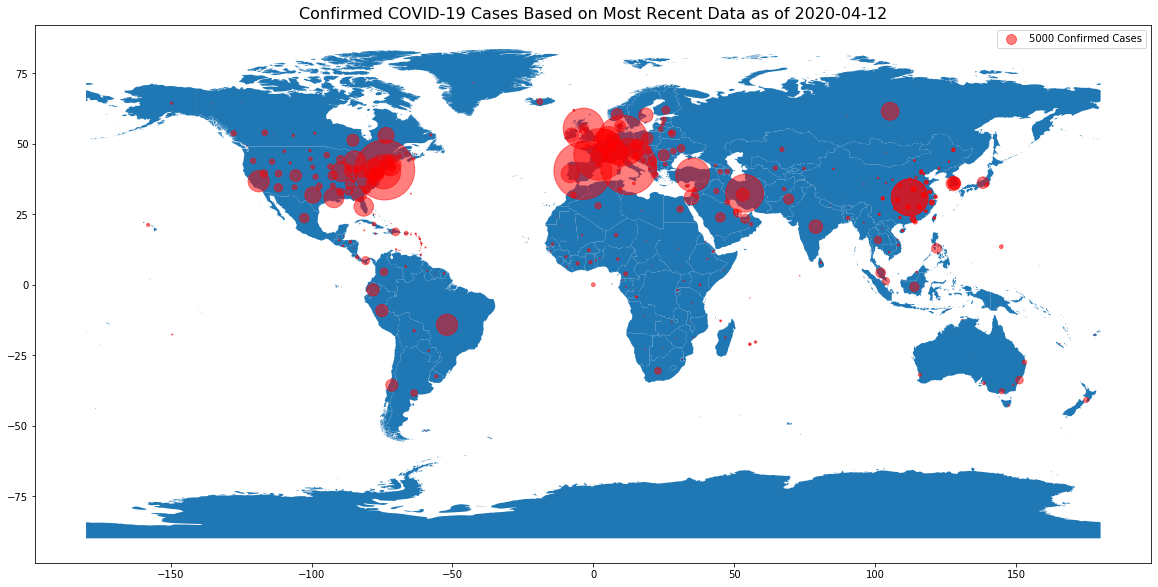

In [43]:
fig, ax = plt.subplots(figsize = (20,15))
ax.set_title("Confirmed COVID-19 Cases Based on Most Recent Data as of " + TODAY, fontsize=16)
worldmap.plot(ax = ax)
geo_df.plot(ax = ax, markersize = geo_df["Confirmed"]/50, 
            color ="red", marker = 'o', label = "5000 Confirmed Cases", alpha=0.5)

lgnd = ax.legend(loc="best", numpoints=1, fontsize=10)

#change the marker size manually for both lines
lgnd.legendHandles[0]._sizes = [100]

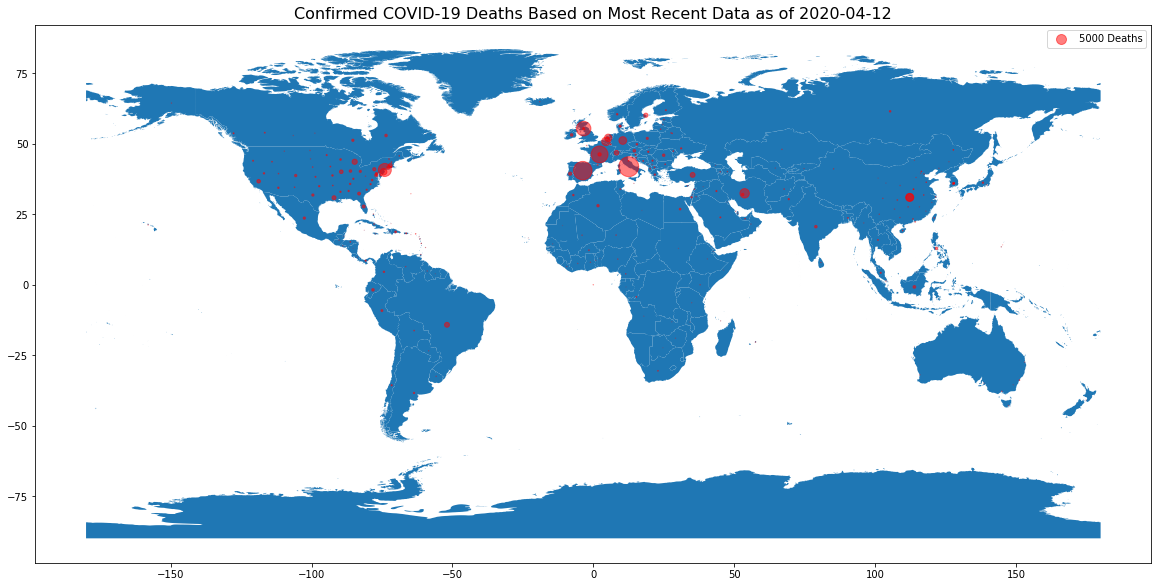

In [47]:
fig, ax = plt.subplots(figsize = (20,20))
ax.set_title("Confirmed COVID-19 Deaths Based on Most Recent Data as of " + TODAY, fontsize=16)
worldmap.plot(ax = ax)
geo_df.plot(ax = ax, markersize = geo_df["Deaths"]/50, 
            color ="red", marker = 'o', label = "5000 Deaths", alpha=0.5)

lgnd = ax.legend(loc="best", numpoints=1, fontsize=10)

#change the marker size manually for both lines
lgnd.legendHandles[0]._sizes = [100]

In [28]:
pd.read_csv("../covid/data/midas_COVID-19/data/cases/united states of america/nytimes_covid19_data/20200410_us-states.csv")

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
2100,2020-04-09,Virginia,51,4042,109
2101,2020-04-09,Washington,53,9608,478
2102,2020-04-09,West Virginia,54,524,5
2103,2020-04-09,Wisconsin,55,2885,116
